# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import json

# Dictionary Creator

In [90]:
def toDict(label, dataframe, number):
    Dict = {}
    col = dataframe.columns.values.tolist()    
    if(number == 0):        
        Dict['Label'] = label
        Dict['Graphs'] = int(1)
        Dict['X'] = col[0]
        Dict['Y'] = col[1]
        trange = []
        trange.append(dataframe.at[0, col[0]])
        trange.append(dataframe.at[dataframe.last_valid_index(), col[0]])
        Dict['Years'] = trange
        vrange = []
        vrange.append(dataframe.at[0, col[1]])
        vrange.append(int(dataframe.at[dataframe.last_valid_index(), col[1]]))
        Dict['Values'] = vrange
        growth = vrange[1] - vrange[0]
        Dict['Growth'] = int(growth)
        if(growth >= 0):
            Dict['Trend'] = "Increase"
        else:
            Dict['Trend'] = "Decrease"
    elif(number == 1):            
        Dict['Label'] = label
        Dict['Graphs'] = int(number)
        Dict['X'] = col[0]
        Dict['Y'] = col[1]        
        Dict['Years'] = dataframe[col[0]].tolist()
        values = dataframe[col[1]].tolist()
        values = [int(i) for i in values]
        Dict['Values'] = values
        growth = values[-1] - values[0]
        Dict['Growth'] = int(growth)
        if(growth >= 0):
            Dict['Trend'] = "Increase"
        else:
            Dict['Trend'] = "Decrease"
    else:
        Dict['Label'] = label
        Dict['Graphs'] = int(number)
        Dict['X'] = col[1]
        Dict['Y'] = col[2]        
        j = 0
        for i in range(number):
            Dict[i] = {}
            years = []
            values = []
            typei = dataframe.at[j, col[0]]
            while True:
                years.append(dataframe.at[j, col[1]])
                values.append(int(dataframe.at[j, col[2]]))
                j += 1
                if(j > dataframe.last_valid_index()):
                    break
                if(typei != dataframe.at[j, col[0]]):
                    break
            Dict[i]['Label'] = typei
            Dict[i]['Years'] = years
            Dict[i]['Values'] = values
            growth = values[-1] - values[0]
            Dict[i]['Growth'] = int(growth)
            if(growth >= 0):
                Dict[i]['Trend'] = "Increase"
            else:
                Dict[i]['Trend'] = "Decrease"
    return Dict

# CSV Reading

In [91]:
data = pd.read_csv(r'Apple Balance Sheet.csv')
BS = pd.DataFrame(data)
BS.dropna()
BS = BS.set_index("Column Name")
#print(BS.info())
#print(BS.head())

In [92]:
data = pd.read_csv(r'Apple Income Statement.csv')
IS = pd.DataFrame(data)
IS.dropna()
IS = IS.set_index("Column Name")
#print(IS.info())
#print(IS.head())

In [93]:
data = pd.read_csv(r'Apple Stock Price.csv')
SP = pd.DataFrame(data)
#print(SP.info())
#print(SP.head())

# Balance Sheet

In [94]:
Type = []
Year = []
Money = []
c = ["Total assets", "Total liabilities", "Total stockholders’ equity"]
r = BS.columns.values.tolist()

for i in c:    
    for j in r:
        Type.append(i)
        Year.append(j)
        Money.append(BS.at[i,j])

BSC = pd.DataFrame(list(zip(Type, Year, Money)), columns =["Type", "Year", "Money"])


In [95]:
print(BSC)

                         Type  Year     Money
0                Total assets  2019  338516.0
1                Total assets  2020  323888.0
2                Total assets  2021  351002.0
3           Total liabilities  2019  248028.0
4           Total liabilities  2020  258549.0
5           Total liabilities  2021  287912.0
6  Total stockholders’ equity  2019   90488.0
7  Total stockholders’ equity  2020   65339.0
8  Total stockholders’ equity  2021   63090.0


<Figure size 576x576 with 0 Axes>

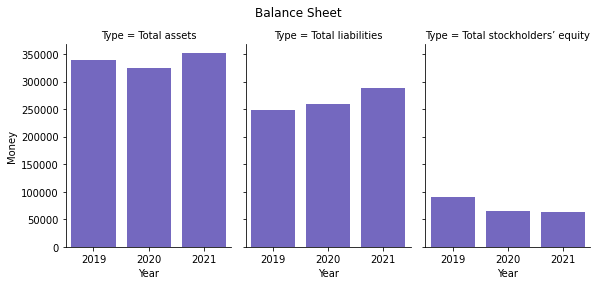

In [96]:
plt.figure(figsize=(8, 8))
db1 = sns.catplot(x="Year", y="Money", col="Type",data=BSC, kind="bar",height=4, aspect=.7, color='slateblue')
db1.fig.subplots_adjust(top=0.85)
db1.fig.suptitle('Balance Sheet')
plt.savefig('ADashboard1.png')

In [97]:
label = "Balance Sheet"
Dashboard1 = toDict(label, BSC, 3)
print(Dashboard1)

{'Label': 'Balance Sheet', 'Graphs': 3, 'X': 'Year', 'Y': 'Money', 0: {'Label': 'Total assets', 'Years': ['2019', '2020', '2021'], 'Values': [338516, 323888, 351002], 'Growth': 12486, 'Trend': 'Increase'}, 1: {'Label': 'Total liabilities', 'Years': ['2019', '2020', '2021'], 'Values': [248028, 258549, 287912], 'Growth': 39884, 'Trend': 'Increase'}, 2: {'Label': 'Total stockholders’ equity', 'Years': ['2019', '2020', '2021'], 'Values': [90488, 65339, 63090], 'Growth': -27398, 'Trend': 'Decrease'}}


# Retained Earnings

In [98]:
Year = BS.columns.values.tolist()
Money = []
Type = "Retained earnings"

for i in Year:
    Money.append(BS.at[Type, i])
    
RE = pd.DataFrame(list(zip(Year, Money)), columns =["Year", "Money"])

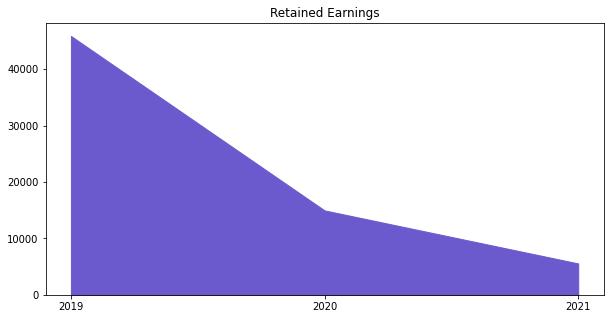

In [99]:
plt.figure(figsize=(10, 5))
db2 = plt.stackplot(RE.Year, RE.Money, color='slateblue');
plt.title("Retained Earnings")
plt.savefig('ADashboard2.png')

In [100]:
label = "Retained Earnings"
Dashboard2 = toDict(label, RE, 1)
print(Dashboard2)

{'Label': 'Retained Earnings', 'Graphs': 1, 'X': 'Year', 'Y': 'Money', 'Years': ['2019', '2020', '2021'], 'Values': [45898, 14966, 5562], 'Growth': -40336, 'Trend': 'Decrease'}


# Income

In [101]:
Type = []
Year = []
Money = []
c = ["Product Sales", "Service and other Sales", "Other income, net"]
r = IS.columns.values.tolist()

for i in c:    
    for j in r:
        Type.append(i)
        Year.append(j)
        Money.append(IS.at[i,j])

INC = pd.DataFrame(list(zip(Type, Year, Money)), columns =["Type", "Year", "Money"])

<Figure size 576x576 with 0 Axes>

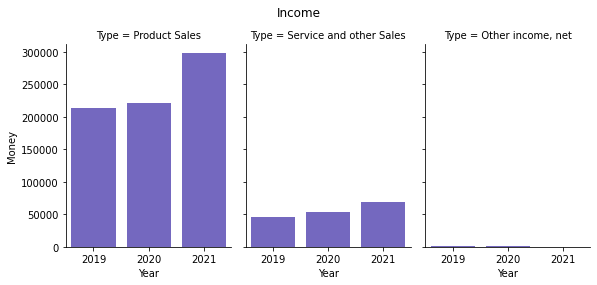

In [102]:
plt.figure(figsize=(8, 8))
db3 = sns.catplot(x="Year", y="Money", col="Type",data=INC, kind="bar",height=4, aspect=.7, color ='slateblue')
db3.fig.subplots_adjust(top=0.85)
db3.fig.suptitle('Income')
plt.savefig('ADashboard3.png')

In [103]:
label = "Income"
Dashboard3 = toDict(label, INC, 3)
print(Dashboard3)

{'Label': 'Income', 'Graphs': 3, 'X': 'Year', 'Y': 'Money', 0: {'Label': 'Product Sales', 'Years': ['2019', '2020', '2021'], 'Values': [213883, 220747, 297392], 'Growth': 83509, 'Trend': 'Increase'}, 1: {'Label': 'Service and other Sales', 'Years': ['2019', '2020', '2021'], 'Values': [46291, 53768, 68425], 'Growth': 22134, 'Trend': 'Increase'}, 2: {'Label': 'Other income, net', 'Years': ['2019', '2020', '2021'], 'Values': [1807, 803, 258], 'Growth': -1549, 'Trend': 'Decrease'}}


# Expenses

In [104]:
Type = []
Year = []
Money = []
c = ["Cost of Product", "Cost of Service and other", "Research and development",
     "Selling, general, and administrative", "Provision for income taxes"]
r = IS.columns.values.tolist()

for i in c:    
    for j in r:
        Type.append(i)
        Year.append(j)
        Money.append(IS.at[i,j])

EX = pd.DataFrame(list(zip(Type, Year, Money)), columns =["Type", "Year", "Money"])

<Figure size 576x576 with 0 Axes>

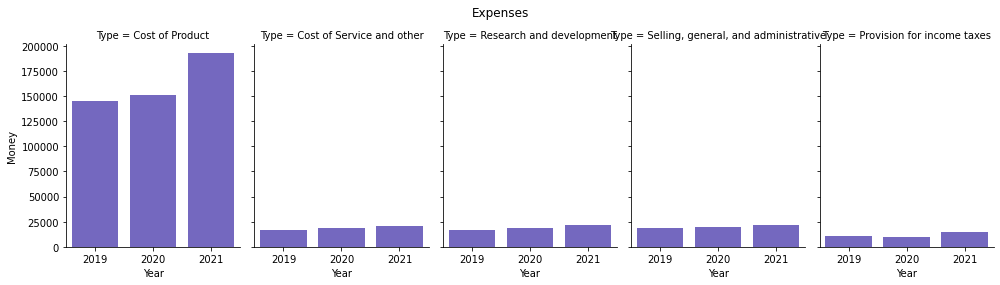

In [105]:
plt.figure(figsize=(8, 8))
db4 = sns.catplot(x="Year", y="Money", col="Type",data=EX, kind="bar",height=4, aspect=.7, color='slateblue')
db4.fig.subplots_adjust(top=0.85)
db4.fig.suptitle('Expenses')
plt.savefig('ADashboard4.png')

In [106]:
label = "Expenses"
Dashboard4 = toDict(label, EX, 5)
print(Dashboard4)

{'Label': 'Expenses', 'Graphs': 5, 'X': 'Year', 'Y': 'Money', 0: {'Label': 'Cost of Product', 'Years': ['2019', '2020', '2021'], 'Values': [144996, 151286, 192266], 'Growth': 47270, 'Trend': 'Increase'}, 1: {'Label': 'Cost of Service and other', 'Years': ['2019', '2020', '2021'], 'Values': [16786, 18273, 20715], 'Growth': 3929, 'Trend': 'Increase'}, 2: {'Label': 'Research and development', 'Years': ['2019', '2020', '2021'], 'Values': [16217, 18752, 21914], 'Growth': 5697, 'Trend': 'Increase'}, 3: {'Label': 'Selling, general, and administrative', 'Years': ['2019', '2020', '2021'], 'Values': [18245, 19916, 21973], 'Growth': 3728, 'Trend': 'Increase'}, 4: {'Label': 'Provision for income taxes', 'Years': ['2019', '2020', '2021'], 'Values': [10481, 9680, 14527], 'Growth': 4046, 'Trend': 'Increase'}}


# Stock Chart

In [107]:
from datetime import date

SP['date_ordinal'] = pd.to_datetime(SP['Date']).apply(lambda date: date.toordinal())

C:\Users\the1b\AppData\Local\Temp\ipykernel_23568\4260015761.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


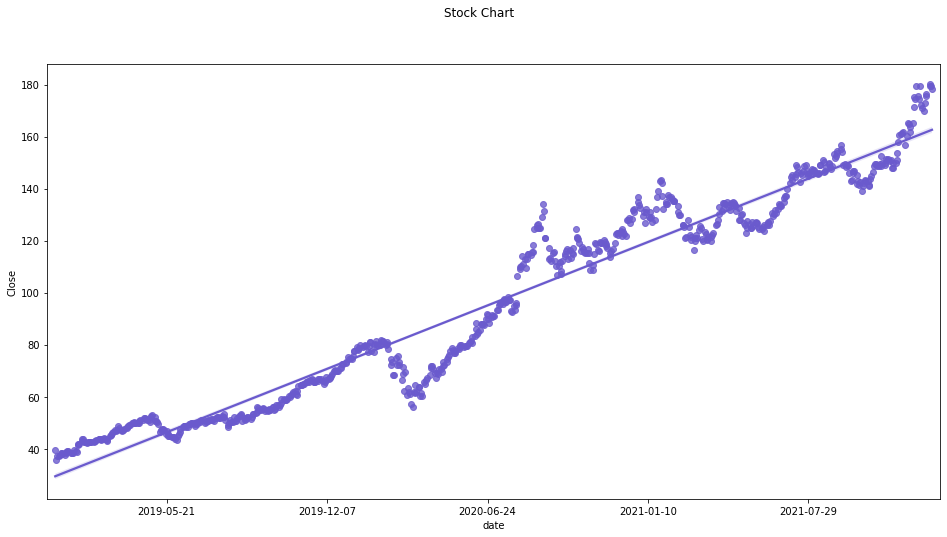

In [108]:
plt.figure(figsize=(16, 8))
plt.suptitle('Stock Chart')
ax = sns.regplot(x="date_ordinal", y="Close", data=SP, fit_reg=True, color='slateblue')
ax.set_xlim(SP['date_ordinal'].min() - 10, SP['date_ordinal'].max() + 10)
ax.set_xlabel('date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)
plt.savefig('ADashboard5.png')

In [109]:
SP = SP.drop(["Open", "High", "Low"], axis=1)
print(SP)

           Date       Close   Adj Close     Volume  date_ordinal
0      1/2/2019   39.480000   38.277519  148158800        737061
1      1/3/2019   35.547501   34.464794  365248800        737062
2      1/4/2019   37.064999   35.936081  234428400        737063
3      1/7/2019   36.982498   35.856094  219111200        737066
4      1/8/2019   37.687500   36.539616  164101200        737067
..          ...         ...         ...        ...           ...
751  12/23/2021  176.279999  176.055695   68356600        738147
752  12/27/2021  180.330002  180.100540   74919600        738151
753  12/28/2021  179.289993  179.061859   79144300        738152
754  12/29/2021  179.380005  179.151749   62348900        738153
755  12/30/2021  178.199997  177.973251   59773000        738154

[756 rows x 5 columns]


In [110]:
label = "Stock Chart"
Dashboard5 = toDict(label, SP, 0)
print(Dashboard5)

{'Label': 'Stock Chart', 'Graphs': 1, 'X': 'Date', 'Y': 'Close', 'Years': ['1/2/2019', '12/30/2021'], 'Values': [39.48, 178], 'Growth': 138, 'Trend': 'Increase'}


# Earnings Per Share

In [111]:
Type = []
Year = []
Money = []
c = ["Basic EPS", "Diluted EPS"]
r = IS.columns.values.tolist()

for i in c:    
    for j in r:
        Type.append(i)
        Year.append(j)
        Money.append(IS.at[i,j])

EPS = pd.DataFrame(list(zip(Type, Year, Money)), columns =["Type", "Year", "Money"])

<Figure size 576x576 with 0 Axes>

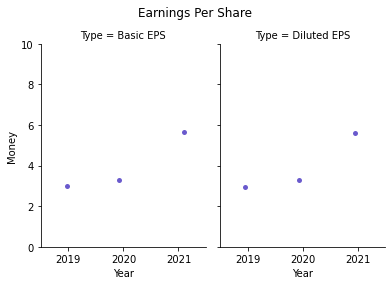

In [112]:
plt.figure(figsize=(8, 8))
ax = sns.catplot(x="Year", y="Money", col="Type",data=EPS, kind="strip",height=4, aspect=.7, color='slateblue')
ax.fig.subplots_adjust(top=0.85)
ax.fig.suptitle('Earnings Per Share')
ax.set(ylim=(0, 10))
plt.savefig('ADashboard6.png')

In [113]:
label = "Earnings Per Share"
Dashboard6 = toDict(label, EPS, 2)
print(Dashboard6)

{'Label': 'Earnings Per Share', 'Graphs': 2, 'X': 'Year', 'Y': 'Money', 0: {'Label': 'Basic EPS', 'Years': ['2019', '2020', '2021'], 'Values': [2, 3, 5], 'Growth': 3, 'Trend': 'Increase'}, 1: {'Label': 'Diluted EPS', 'Years': ['2019', '2020', '2021'], 'Values': [2, 3, 5], 'Growth': 3, 'Trend': 'Increase'}}


# JSON

In [114]:
with open("AGraphDict1.json","w") as outfile:
    json.dump(Dashboard1,outfile, indent=3)

In [115]:
with open("AGraphDict2.json","w") as outfile:
    json.dump(Dashboard2,outfile, indent=3)

In [116]:
with open("AGraphDict3.json","w") as outfile:
    json.dump(Dashboard3,outfile, indent=3)

In [117]:
with open("AGraphDict4.json","w") as outfile:
    json.dump(Dashboard4,outfile, indent=3)

In [118]:
with open("AGraphDict5.json","w") as outfile:
    json.dump(Dashboard5,outfile, indent=3)

In [119]:
with open("AGraphDict6.json","w") as outfile:
    json.dump(Dashboard6,outfile, indent=3)